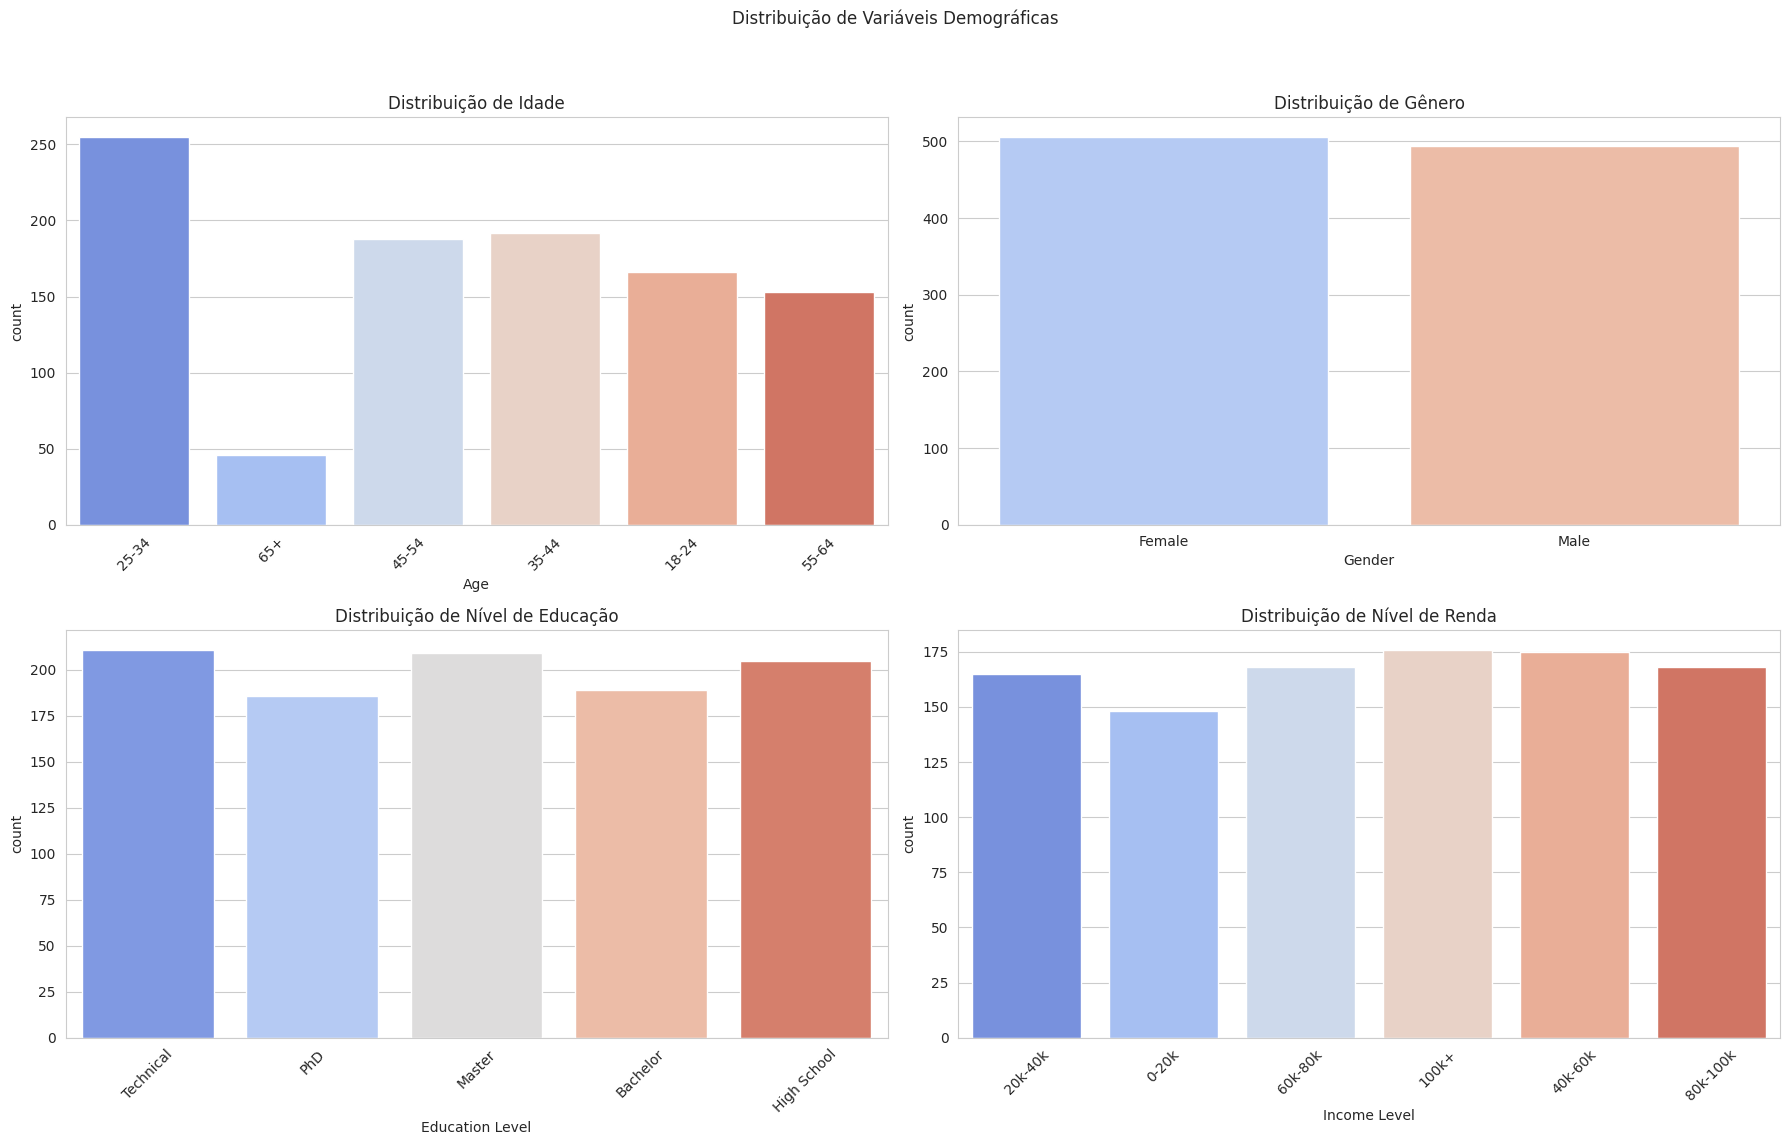

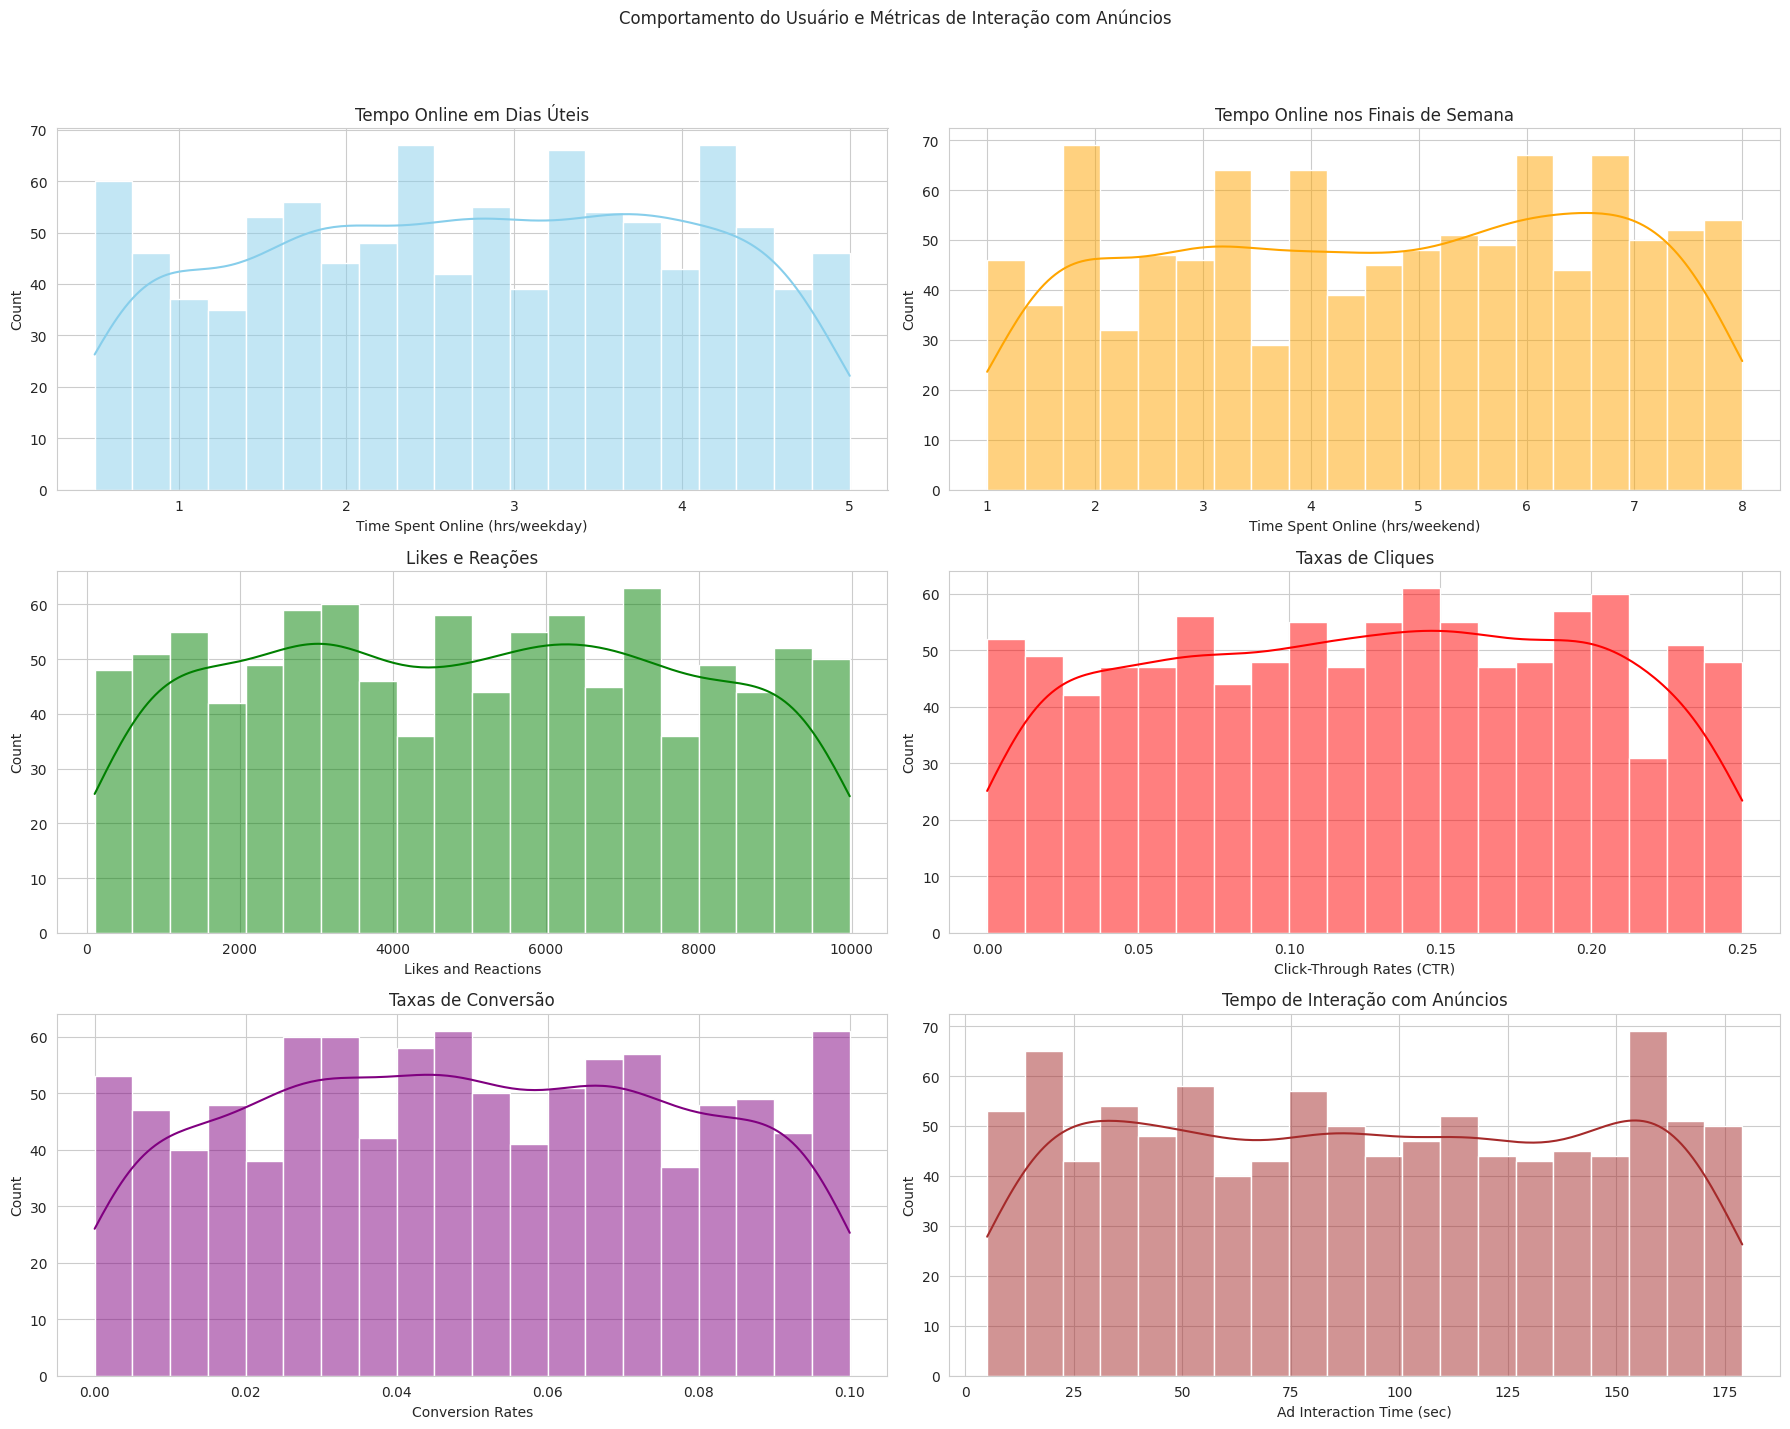

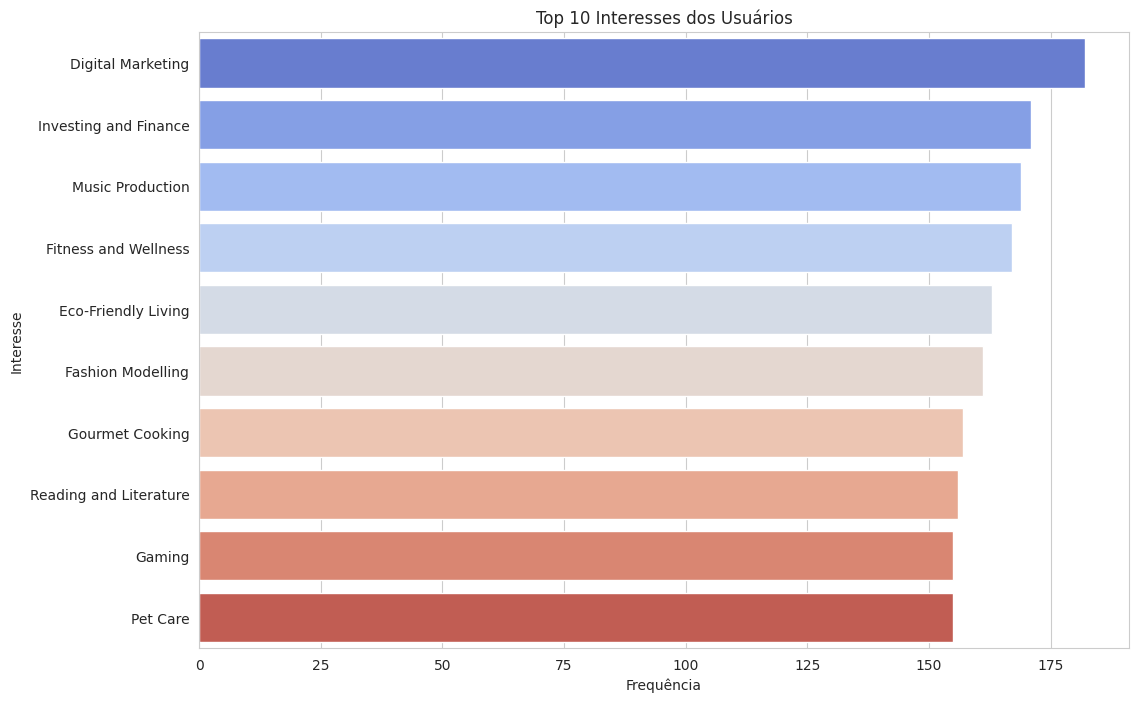

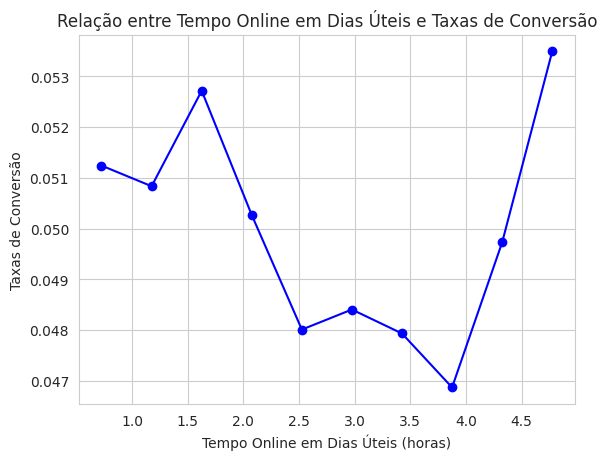

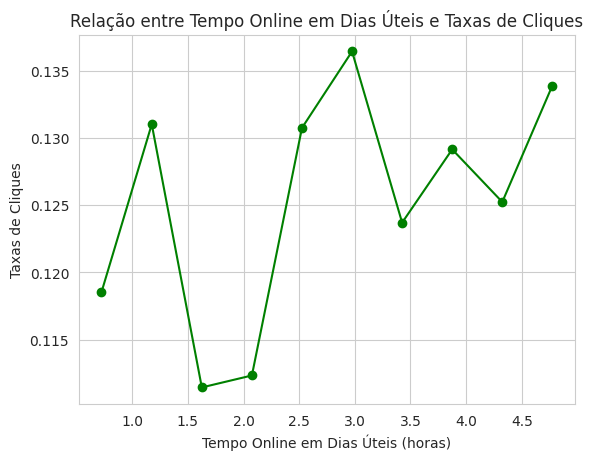

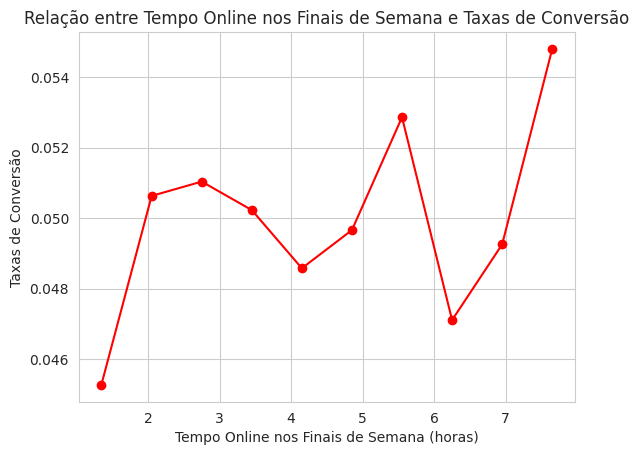

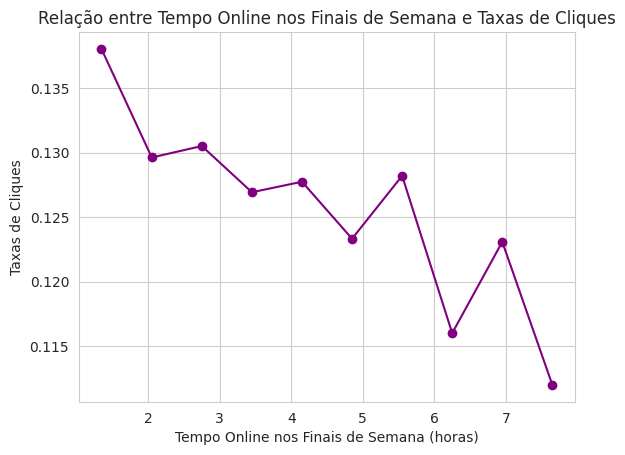

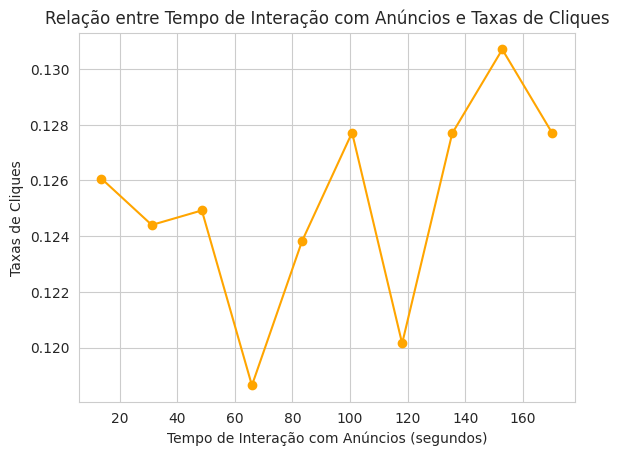

Segmentos com Relevância Alta e Mais de uma Classe:
   Segment                                        Description Relevance
0        1  Localização relevante: Rural, Tipo de Disposit...      Alta
1        3  Gênero: Female, Tipo de Dispositivo: Desktop O...      Alta
2        5  Gênero: Female, Localização relevante: Suburba...      Alta
3        7  Gênero: Male, Localização relevante: Suburban,...      Alta
4        9        Gênero: Female, Nível de Educação: Bachelor      Alta
5       10  Localização relevante: Suburban, Interesse em ...      Alta
6       13  Gênero: Male, Tipo de Dispositivo: Mobile + De...      Alta
7       14  Gênero: Female, Localização relevante: Suburba...      Alta
8       16  Localização relevante: Rural, Interesse em Dat...      Alta
9       18         Gênero: Male, Localização relevante: Urban      Alta


In [28]:
# Importação das bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação e análise de dados
from sklearn.cluster import KMeans  # Algoritmo de clustering K-Means
from sklearn.preprocessing import StandardScaler  # Ferramenta para padronização de dados
import seaborn as sns  # Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Biblioteca de plotagem
from collections import Counter  # Contador para contar a frequência dos interesses
import numpy as np # Biblioteca para cálculos numéricos

class UserSegmentationSystem:
    """
    Um sistema de segmentação de usuários que utiliza o algoritmo K-means para agrupar os usuários em segmentos distintos
    com base em características demográficas, comportamentais e de engajamento.

    O sistema é projetado como uma classe para encapsular a funcionalidade relacionada à segmentação de usuários,
    facilitando o reuso, a organização e a manutenção do código.
    """

    def __init__(self, data_path):
        """
        Inicializa o sistema de segmentação de usuários.

        Parameters:
        - data_path (str): O caminho do arquivo CSV contendo os dados dos perfis de usuários.
        """
        self.data = pd.read_csv(data_path)
        self.cluster_model = None

    def preprocess_data(self):
        """
        Realiza o pré-processamento dos dados, removendo colunas desnecessárias e aplicando codificação one-hot para colunas categóricas.
        """
        # Pré-processamento de dados
        self.data = self.data.drop(['User ID'], axis=1)  # Remoção da coluna 'User ID'
        self.data = pd.get_dummies(self.data)  # Codificação one-hot para colunas categóricas
        self.data = self.data.dropna()  # Remoção de linhas com valores ausentes

    def apply_kmeans(self, k=5):
        """
        Aplica o algoritmo K-means para agrupar os usuários em segmentos.

        Parameters:
        - k (int): O número de clusters desejado.
        """
        # Normalização de dados
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(self.data)

        # Aplicar o algoritmo K-means
        self.cluster_model = KMeans(n_clusters=k, n_init=10, random_state=42)
        self.cluster_model.fit(data_scaled)
        self.data['Segment'] = self.cluster_model.labels_

    def analyze_segments(self):
        """
        Analisa os segmentos gerados e classifica-os com base em características importantes, como interesses, localização e gênero.
        """
        # Análise dos segmentos
        segments = self.data.groupby('Segment').mean()

        # Classificação dos segmentos com base em características importantes
        segment_classification = []
        for index, row in segments.iterrows():
            segment_info = {
                'Segment': index,
                'Description': '',
                'Relevance': ''
            }

            # Determinar a descrição do segmento com base nas características mais importantes
            description = []
            unique_values = self.data.columns
            for col in unique_values:
                if 'Top Interests_' in col and row[col] > 0.5:
                    description.append(f'Interesse em {col[14:].replace("_", " ")}')
                if 'Language_' in col and row[col] > 0.5:
                    description.append(f'Usuários que falam {col[9:].replace("_", " ")}')
                if 'Location_' in col and row[col] > 0.5:
                    description.append(f'Localização relevante: {col[9:].replace("_", " ")}')
                if 'Gender_' in col and row[col] > 0.5:
                    description.append(f'Gênero: {col[7:].replace("_", " ")}')
                if 'Education Level_' in col and row[col] > 0.5:
                    description.append(f'Nível de Educação: {col[16:].replace("_", " ")}')
                if 'Device Usage_' in col and row[col] > 0.5:
                    description.append(f'Tipo de Dispositivo: {col[13:].replace("_", " ")}')

            if description:
                segment_info['Description'] = ', '.join(description)
            else:
                segment_info['Description'] = 'Segmento não definido'

            # Determinar a relevância do segmento
            if row['Conversion Rates'] > 0.05 or row['Click-Through Rates (CTR)'] > 0.15:
                segment_info['Relevance'] = 'Alta'
            else:
                segment_info['Relevance'] = 'Baixa'

            # Adicionar segmento apenas se a relevância for alta e houver mais de uma classe na descrição
            if segment_info['Relevance'] == 'Alta' and len(description) > 1:
                segment_classification.append(segment_info)

        return segment_classification

class DataVisualization:
    """
    Uma classe para visualização de dados que oferece métodos para criar gráficos
    relevantes para análise dos perfis de usuários.
    """

    def __init__(self, data_path):
        """
        Inicializa a classe de visualização de dados.

        Parameters:
        - data_path (str): O caminho do arquivo CSV contendo os dados dos perfis de usuários.
        """
        self.data = pd.read_csv(data_path)

    def demographic_distributions(self):
        """
        Cria gráficos para visualizar a distribuição de variáveis demográficas, como idade, gênero, nível de educação e renda.
        """
        # Definição do estilo estético dos gráficos
        sns.set_style("whitegrid")

        # Criando subplots para as distribuições demográficas
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle('Distribuição de Variáveis Demográficas')

        # Distribuição de idade
        sns.countplot(ax=axes[0, 0], x='Age', data=self.data, palette='coolwarm', hue='Age', legend=False)
        axes[0, 0].set_title('Distribuição de Idade')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Distribuição de gênero
        sns.countplot(ax=axes[0, 1], x='Gender', data=self.data, palette='coolwarm', hue='Gender', legend=False)
        axes[0, 1].set_title('Distribuição de Gênero')

        # Distribuição de nível de educação
        sns.countplot(ax=axes[1, 0], x='Education Level', data=self.data, palette='coolwarm', hue='Education Level', legend=False)
        axes[1, 0].set_title('Distribuição de Nível de Educação')
        axes[1, 0].tick_params(axis='x', rotation=45)

        # Distribuição de renda
        sns.countplot(ax=axes[1, 1], x='Income Level', data=self.data, palette='coolwarm', hue='Income Level', legend=False)
        axes[1, 1].set_title('Distribuição de Nível de Renda')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def user_behavior_metrics(self):
        """
        Cria gráficos para visualizar métricas de comportamento do usuário e interação com anúncios, como tempo online, likes, taxas de cliques e conversão.
        """
        # Criando subplots para o comportamento do usuário e métricas de interação com anúncios
        fig, axes = plt.subplots(3, 2, figsize=(18, 15))
        fig.suptitle('Comportamento do Usuário e Métricas de Interação com Anúncios')

        # Tempo gasto online em dias úteis
        sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=self.data, bins=20, kde=True, color='skyblue')
        axes[0, 0].set_title('Tempo Online em Dias Úteis')

        # Tempo gasto online nos finais de semana
        sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=self.data, bins=20, kde=True, color='orange')
        axes[0, 1].set_title('Tempo Online nos Finais de Semana')

        # Likes e reações
        sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=self.data, bins=20, kde=True, color='green')
        axes[1, 0].set_title('Likes e Reações')

        # Taxas de cliques
        sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=self.data, bins=20, kde=True, color='red')
        axes[1, 1].set_title('Taxas de Cliques')

        # Taxas de conversão
        sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=self.data, bins=20, kde=True, color='purple')
        axes[2, 0].set_title('Taxas de Conversão')

        # Tempo de interação com anúncios
        sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=self.data, bins=20, kde=True, color='brown')
        axes[2, 1].set_title('Tempo de Interação com Anúncios')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def top_interests(self):
        """
        Cria um gráfico de barras para visualizar os interesses mais comuns dos usuários.
        """
        # Dividindo a coluna 'Top Interests' e criando uma lista de todos os interesses
        interests_list = self.data['Top Interests'].str.split(', ').sum()

        # Contagem da frequência de cada interesse
        interests_counter = Counter(interests_list)

        # Convertendo o objeto Counter para um DataFrame para facilitar a plotagem
        interests_df = pd.DataFrame(interests_counter.items(), columns=['Interesse', 'Frequência']).sort_values(by='Frequência', ascending=False)

        # Plotagem dos interesses mais comuns
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frequência', y='Interesse', data=interests_df.head(10), hue='Interesse', palette='coolwarm', legend=False)
        plt.title('Top 10 Interesses dos Usuários')
        plt.xlabel('Frequência')
        plt.ylabel('Interesse')
        plt.show()

    def linear_relationships(self):
        """
        Cria gráficos para visualizar relações lineares entre diferentes variáveis.
        """
        # Selecionando uma amostra aleatória dos dados para melhorar a visualização
        sample_data = self.data.sample(n=1000, random_state=42)

        # Função para agrupar e calcular a média dos dados
        def bin_and_mean(data, x_col, y_col, bins):
            x_bins = pd.cut(data[x_col], bins=bins)
            mean_y = data.groupby(x_bins)[y_col].mean()
            x_values = [np.mean([bin.left, bin.right]) for bin in mean_y.index]
            return x_values, mean_y.values

        # Definindo os intervalos para agrupar os dados
        bins = 10

        # Relação linear entre Tempo Online em Dias Úteis e Taxas de Conversão
        x_values, y_values = bin_and_mean(sample_data, 'Time Spent Online (hrs/weekday)', 'Conversion Rates', bins)
        plt.plot(x_values, y_values, marker='o', color='blue')
        plt.title('Relação entre Tempo Online em Dias Úteis e Taxas de Conversão')
        plt.xlabel('Tempo Online em Dias Úteis (horas)')
        plt.ylabel('Taxas de Conversão')
        plt.show()

        # Relação linear entre Tempo Online em Dias Úteis e Taxas de Cliques
        x_values, y_values = bin_and_mean(sample_data, 'Time Spent Online (hrs/weekday)', 'Click-Through Rates (CTR)', bins)
        plt.plot(x_values, y_values, marker='o', color='green')
        plt.title('Relação entre Tempo Online em Dias Úteis e Taxas de Cliques')
        plt.xlabel('Tempo Online em Dias Úteis (horas)')
        plt.ylabel('Taxas de Cliques')
        plt.show()

        # Relação linear entre Tempo Online nos Finais de Semana e Taxas de Conversão
        x_values, y_values = bin_and_mean(sample_data, 'Time Spent Online (hrs/weekend)', 'Conversion Rates', bins)
        plt.plot(x_values, y_values, marker='o', color='red')
        plt.title('Relação entre Tempo Online nos Finais de Semana e Taxas de Conversão')
        plt.xlabel('Tempo Online nos Finais de Semana (horas)')
        plt.ylabel('Taxas de Conversão')
        plt.show()

        # Relação linear entre Tempo Online nos Finais de Semana e Taxas de Cliques
        x_values, y_values = bin_and_mean(sample_data, 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', bins)
        plt.plot(x_values, y_values, marker='o', color='purple')
        plt.title('Relação entre Tempo Online nos Finais de Semana e Taxas de Cliques')
        plt.xlabel('Tempo Online nos Finais de Semana (horas)')
        plt.ylabel('Taxas de Cliques')
        plt.show()

        # Relação linear entre Tempo de Interação com Anúncios e Taxas de Cliques
        x_values, y_values = bin_and_mean(sample_data, 'Ad Interaction Time (sec)', 'Click-Through Rates (CTR)', bins)
        plt.plot(x_values, y_values, marker='o', color='orange')
        plt.title('Relação entre Tempo de Interação com Anúncios e Taxas de Cliques')
        plt.xlabel('Tempo de Interação com Anúncios (segundos)')
        plt.ylabel('Taxas de Cliques')
        plt.show()


# Obtenção dos dados de teste
# Os dados foram obtidos em https://statso.io/user-profiling-case-study/

# Os dados representam perfis de usuários para um estudo de segmentação de usuários para publicidade.
dados = 'https://statso.io/wp-content/uploads/2024/02/user_profiles_for_ads.csv'

# Instanciando a classe UserSegmentationSystem e passado os dados
user_segmentation = UserSegmentationSystem(dados)
user_segmentation.preprocess_data()
user_segmentation.apply_kmeans(k=20)  # Altera o número de segmentos para 20

# Instanciando a classe DataVisualization e passando os dados
data_visualization = DataVisualization(dados)

# Chamando os métodos para visualização dos dados
data_visualization.demographic_distributions()
data_visualization.user_behavior_metrics()
data_visualization.top_interests()
data_visualization.linear_relationships()

# Analisar e classificar os segmentos com relevância alta e mais de uma classe
segment_info = user_segmentation.analyze_segments()

# Converter a lista de dicionários em um DataFrame do pandas
segment_df = pd.DataFrame(segment_info)

# Exibir o DataFrame
print("Segmentos com Relevância Alta e Mais de uma Classe:")
print(segment_df)
